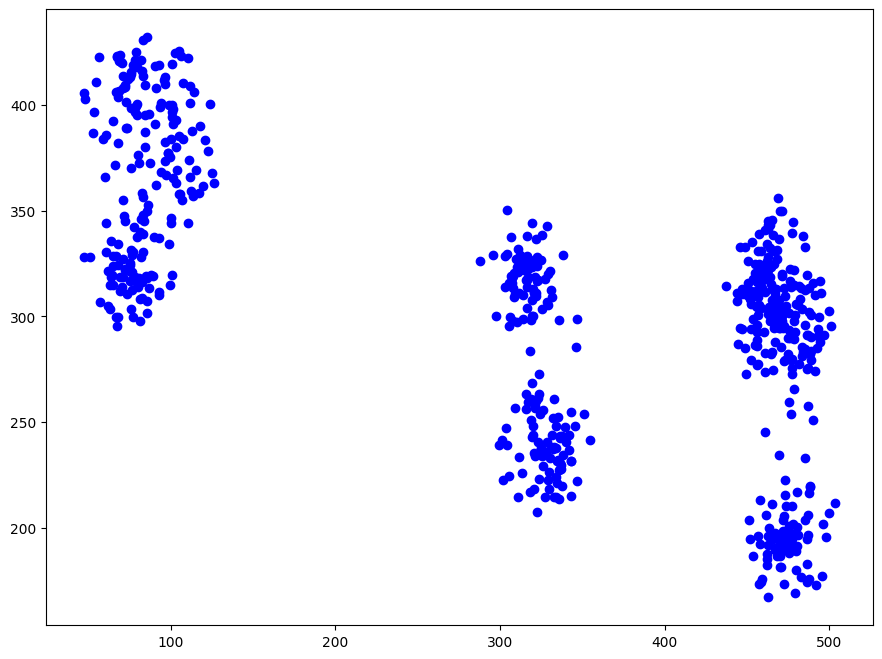

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

points = np.empty((0, 2), dtype='f')

c_radius = 3
c_color = (0, 0, 255)
c_thickness = 0
jet_radius = 30
jet_thr = .5

bg_color = (255, 255, 255)
(width, height) = (640, 480)
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("data generator")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False

    if pushing and np.random.uniform(0, 1) > jet_thr:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, jet_radius)
        phi = np.random.uniform(0, 2 * np.pi)
        coord = [x + r * np.cos(phi), height - (y + r * np.sin(phi))]
        points = np.append(points, [coord], axis=0)

    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen, c_color, (int(point[0]), height - int(point[1])), c_radius, c_thickness)
    pygame.display.flip()

pygame.quit()

fig = plt.figure(figsize=(width / 60, height / 60))
plt.scatter(points[:, 0], points[:, 1], c="blue")
plt.show()

## ДЗ 1. Класс kmeans

Дано:
- дан класс K_Means кластеризации данных
Требуется:
- изменить способ задания начальных положений центров кластеров: разбросать случайным образом между(!) точек заданного обучающего множества dataset (определив разброс точек по всем координатам)
- изменить способ задания параметра tolerance: значение параметра должно равняться 1/10000 от минимального диапазона изменения признаков объектов (например, если один признак изменятся в диапазоне [100,200], а другой - [0.1,10], то tolerance = (10-0.1)/10000)
- дописать метод get_dist: пользователь должен иметь возможность использовать одну из 4 метрик при подсчете расстояний между объектами (евклидово расстояние, квадрат евклидова расстояния, расстояние городских кварталов, расстояние Чебышёва)
- написать метод get_predict: методом можно воспользоваться только после обучения модели (fitted == True), метод принимает двумерный массив объектов (могут быть точки не принадлежащие исходному обучающему множеству dataset), метод возвращает одномерный массив индексов соответствующих кластеров (по близости до центров кластеров)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

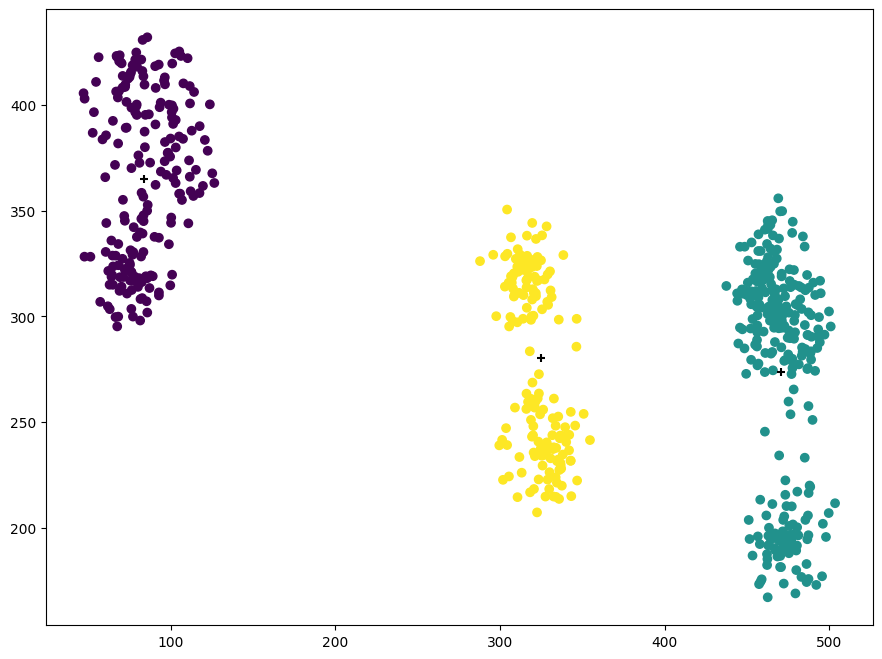

In [84]:
import numpy as np
import matplotlib.pyplot as plt


class K_means():

    def __init__(self, dataset, n_clusters=3, dist_type='euclid'):
        if dist_type == 'euclid':
            self.get_dist = lambda list1, list2: np.sqrt(sum([(i - j) ** 2 for i, j in zip(list1, list2)]))
        if dist_type == 'euclid_square':
            self.get_dist = lambda list1, list2: sum([(i - j) ** 2 for i, j in zip(list1, list2)])
        if dist_type == 'manhattan':
            self.get_dist = lambda list1, list2: sum([abs(i - j) for i, j in zip(list1, list2)])
        if dist_type == 'chebishev':
            self.get_dist = lambda list1, list2: max([abs(i - j) for i, j in zip(list1, list2)])
        if isinstance(dist_type, tuple) and dist_type[0] == 'powered':
            self.get_dist = (
                lambda list1, list2: sum([(i - j) ** dist_type[1] for i, j in zip(list1, list2)]) ** (1 / dist_type[1])
            )

        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = 1e-5 * min(np.max(points[:, 0]) - np.min(points[:, 0]),
                                    np.max(points[:, 1]) - np.min(points[:, 1]))
        self.fitted = False
        self.labels = np.array([], dtype='i')
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)]

    def distribute_data(self):
        self.labels = np.array([], dtype='i')
        for data in self.dataset:
            dist = np.array([self.get_dist(data, center)
                                for center in self.centroids])
            self.labels = np.append(self.labels, dist.argmin())

    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.empty(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp / num

    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i, j) for i, j in zip(prev_centroids, self.centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True

    def predict(self, list2d):
        if not self.fitted:
            raise Exception("First need to fit")

        predicted = []
        for i in list2d:
            predicted.append(np.argmin([self.get_dist(i, j) for j in self.centroids]))

        return predicted


kmeans = K_means(points)
kmeans.distribute_data()
print(kmeans.labels)
kmeans.recalculate_centroids()
print(kmeans.centroids)

kmeans.fit()
print(kmeans.predict([[10, 400], [300, 300]]))
print(kmeans.centroids)

fig = plt.figure(figsize=(width / 60, height / 60))
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='+')
plt.show()

## ДЗ 2. Класс C_Means

Дано:
- гиперпараметр числа кластеров (n_clusters)
- гиперпараметр размытости (fuzzy)
- гиперпараметр отсечения (cut)
Требуется:
- реализовать обработку исключений, возникающих при делении на ноль
- дописать класс C_Means:

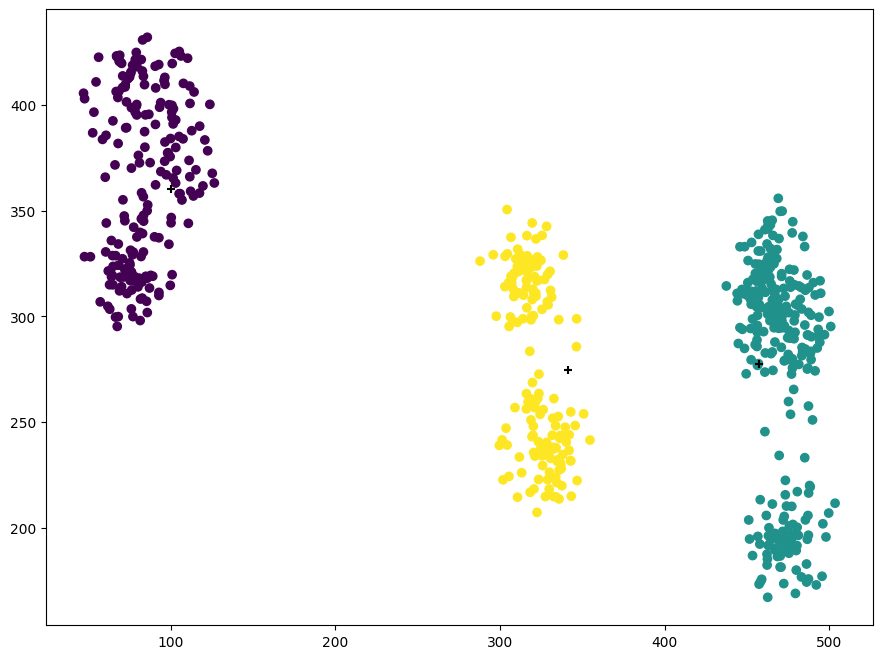

In [98]:
## ДЗ

class C_Means():

    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut = cut
        self.max_n_iter = 100
        self.tolerance = 1e-2
        self.fitted = False
        self.labels = np.array([], dtype='i')
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)] + 1
        self.U = np.array([], dtype='f')

    def get_dist(self, list1, list2):
        return np.sqrt(sum((i - j) ** 2 for i, j in zip(list1, list2)))

    def distribute_data(self, dataset):
        dist = np.array([[self.get_dist(data, center) for center in self.centroids] for data in dataset])
        U = np.divide(1, dist) ** self.fuzzy

        # Обработка некорректных результатов после деления на 0
        U[U == np.inf] = 0
        U = U / U.sum(axis=1)[:, None]
        return U

    def get_point_label(self, i, U):
        return (np.argmax(U[i]) + 1) if (np.max(U[i]) > self.cut) else 0

    def recalculate_centroids(self):
        self.centroids = np.array(
            [np.dot(self.U.T[i], self.dataset) / self.U.sum(axis=0)[i] for i in range(self.n_clusters)]
        )

    def get_labels(self, U):
        return np.array([self.get_point_label(i, U) for i in range(U.shape[0])])

    def fit(self):
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.U = self.distribute_data(self.dataset)
            self.recalculate_centroids()
            if np.array([self.get_dist(i, j) for i, j in zip(prev_centroids, self.centroids)]).max() < self.tolerance:
                break
            iter += 1
        self.fitted = True
        self.labels = self.get_labels(self.U)

    def predict(self, list2d):
        labels = []
        if self.fitted:
            labels = self.get_labels(self.distribute_data(list2d))
        return labels


cmeans = C_Means(points)
cmeans.fit()
cmeans.predict([[10, 400], [300, 300]])
fig = plt.figure(figsize=(width / 60, height / 60))
plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels)
plt.scatter(cmeans.centroids[:, 0], cmeans.centroids[:, 1], c='black', marker='+')
plt.show()